In [1]:
import matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



C:\Users\symmy\AppData\Local\Temp\ipykernel_29888\2137494570.py:18: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(russia.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_29888\2137494570.py:18: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(russia.iloc[0].geometry)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

<AxesSubplot:>

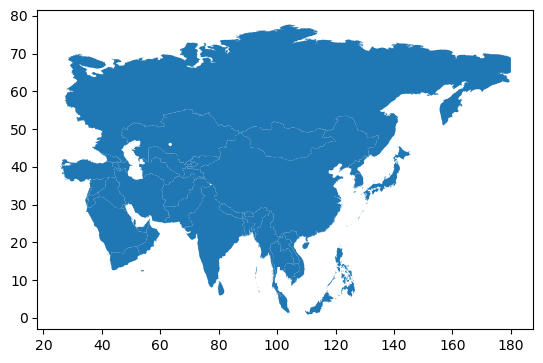

In [2]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
sub_cont = df.loc[df['ADMIN'].isin(['Cambodia', 'Laos', 'Myanmar', 
                                    'Thailand', 'Vietnam', 'Singapore',
                                    'China', 'India', 'Bangladesh',
                                    'Pakistan', 'Nepal', 'Bhutan',
                                    'North Korea', 'South Korea', 'Kazakhstan', 
                                    'Tajikistan', 'Uzbekistan', 'Kyrgyzstan', 
                                    'Turkmenistan', 'Afghanistan',
                                    'Mongolia', 'Japan', 'Iran',
                                    'Malaysia', 'Philippines', 'Iraq', 'Syria',
                                    'Georgia', 'Armenia', 'Azerbaijan', 'Oman',
                                    'Saudi Arabia', 'Yemen', 'Israel', 'Lebanon',
                                    'Jordan', 'Turkey', 'Sri Lanka', 'Kuwait',
                                    'United Arab Emirates', 'Dubai', 'Bahrain',
                                    'Qatar', 'Palestine'])]

russia = df.loc[df['ADMIN'] == 'Russia']
Polygons = list(russia.iloc[0].geometry)
russia.geometry = [Polygons[0]]

sub_cont = pd.concat([sub_cont, russia])

sub_cont.plot()

In [3]:

asia_rivers = pd.concat([gpd.read_file("../../Nature/rivers/data/rivers/europe/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/asia/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/siberia/a00000009.gdbtable"),
                         gpd.read_file("../../Nature/rivers/data/rivers/aus/a00000009.gdbtable")])

print(asia_rivers)

        HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0       20000001          0  20000001       0.69         0.0         5.6   
1       20000002          0  20000002       4.09         0.0         7.7   
2       20000003          0  20000003       5.09         0.0         9.2   
3       20000004          0  20000004       3.95         0.0         9.8   
4       20000005          0  20000005       1.77         0.0        12.0   
...          ...        ...       ...        ...         ...         ...   
836467  50836468   50836467  50836467       1.23         1.1         3.4   
836468  50836469          0  50836469       0.94         0.0         2.4   
836469  50836470          0  50836470       1.47         0.0         3.0   
836470  50836471          0  50836471       0.80         0.0         2.6   
836471  50836472          0  50836472       1.47         0.0         2.7   

        CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  \
0       13.

In [4]:
asia_rivers = gpd.sjoin(asia_rivers, sub_cont, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

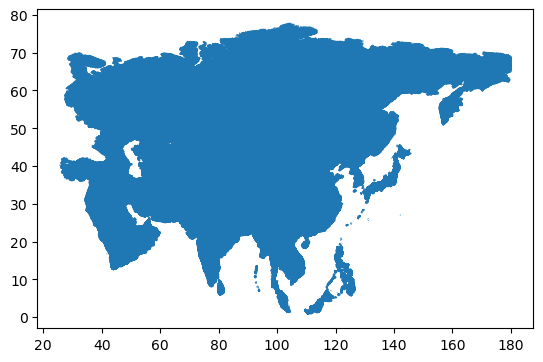

In [5]:
asia_rivers.plot()

In [6]:
asia_rivers = asia_rivers.drop(columns=['index_right'])

In [7]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

asia_lakes = gpd.sjoin(lakes, sub_cont, op='intersects')
asia_lakes = lakes.loc[lakes.index.isin(asia_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(asia_rivers, asia_lakes, op='within')
asia_rivers = asia_rivers.loc[~asia_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
asia_rivers = asia_rivers.loc[asia_rivers['ORD_FLOW'] < 8]

In [9]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp"), 
                    gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp")])

In [10]:
new_basins = gpd.sjoin(basins, sub_cont, op="intersects")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [11]:
from shapely.ops import unary_union

geoms = [unary_union(new_basins.loc[new_basins['MAJ_NAME'] == poly_basin].geometry.tolist()) for poly_basin in new_basins.MAJ_NAME.unique().tolist()]
geoms_area = [geom.area for geom in geoms]
names = [poly_basin for poly_basin in new_basins.MAJ_NAME.unique().tolist()]

In [12]:
new_basins = gpd.GeoDataFrame(pd.DataFrame({"name": names, "area": geoms_area}), geometry=geoms)

In [13]:
new_basins = new_basins.sort_values(["area"], ascending=False)

In [14]:
new_basins_copy = new_basins.copy()

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': 'lime', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'red', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': '#882D17', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': '#ee82ee',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000', 
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': '#8b008b', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'black',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f'}

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})

In [15]:
print(colors_df)

                        basin   colors
0         Siberia, West Coast    black
1                          Ob  #ffa500
2                        Lena  #808000
3                     Yenisey  #483d8b
4        Siberia, North Coast  #dc143c
..                        ...      ...
83                     Hainan  #882D17
84           Baltic Sea Coast  #228B22
85            Sinai Peninsula  #3cb371
86  Andaman - Nicobar Islands  #875692
87                     Taiwan  #2f4f4f

[88 rows x 2 columns]


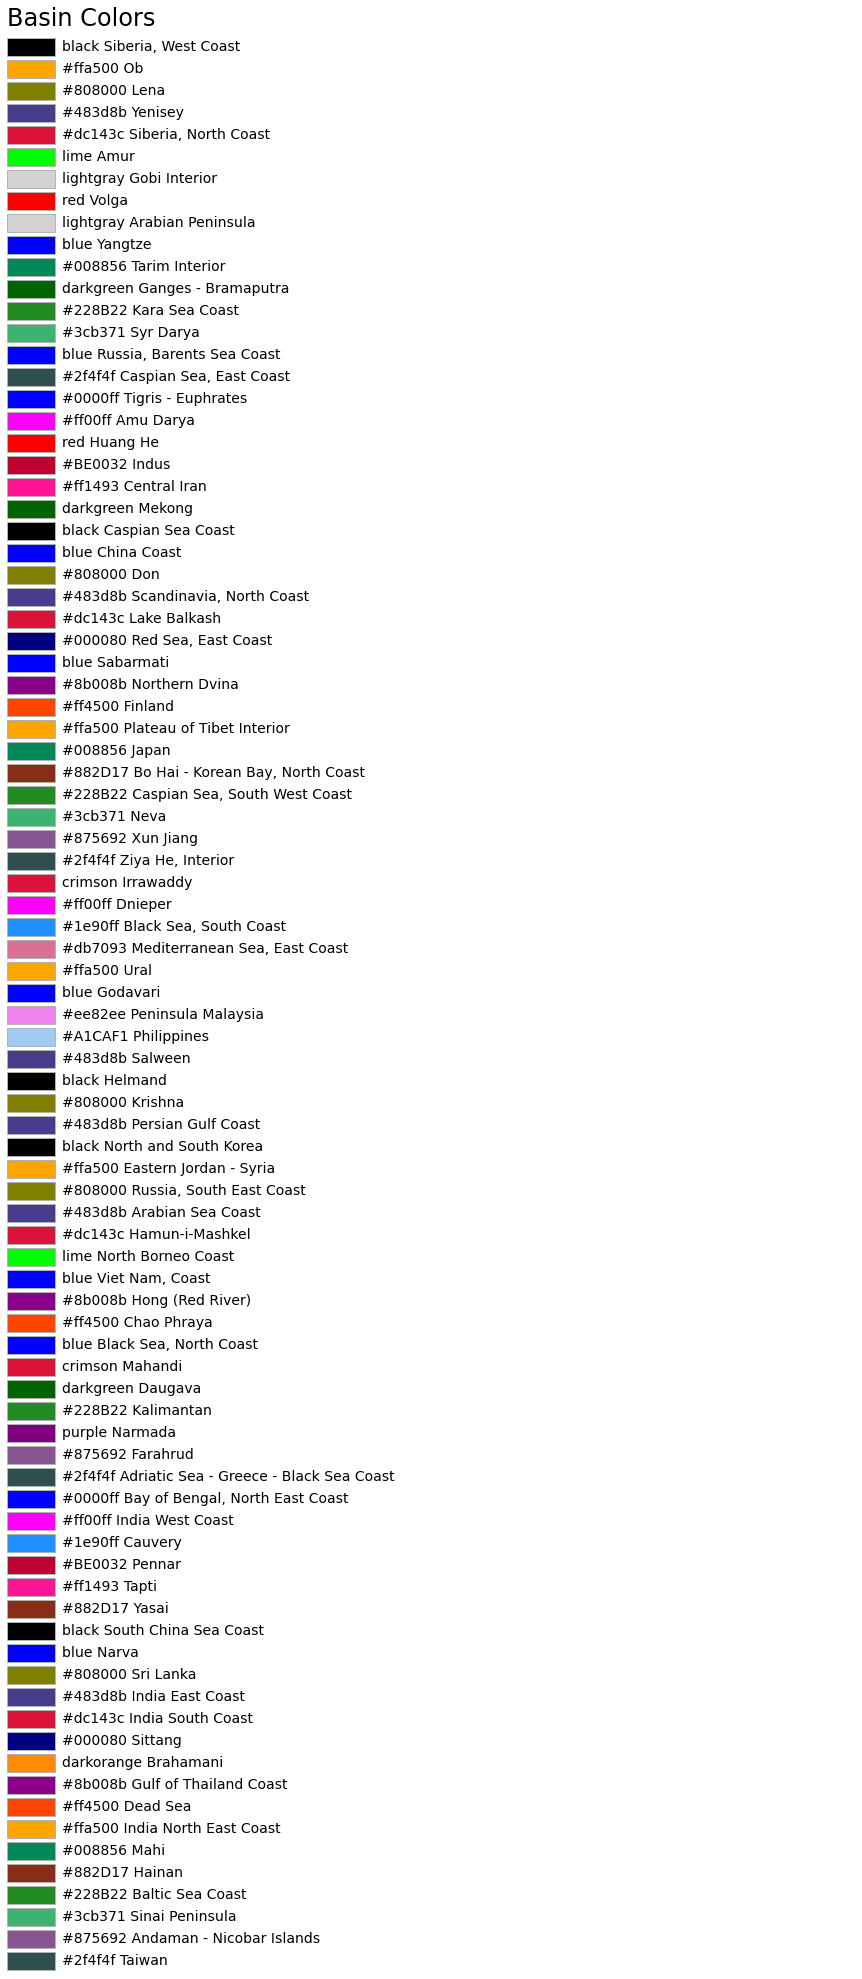

In [16]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colors.keys())
ncols = 1
nrows = len(colors.keys())
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colors.values(), colors.keys())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


In [17]:
new_basins_copy = pd.merge(new_basins_copy, colors_df, left_on='name', right_on='basin', how='left')

In [18]:
new_basins_copy = new_basins_copy[['name', 'geometry', 'colors']]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


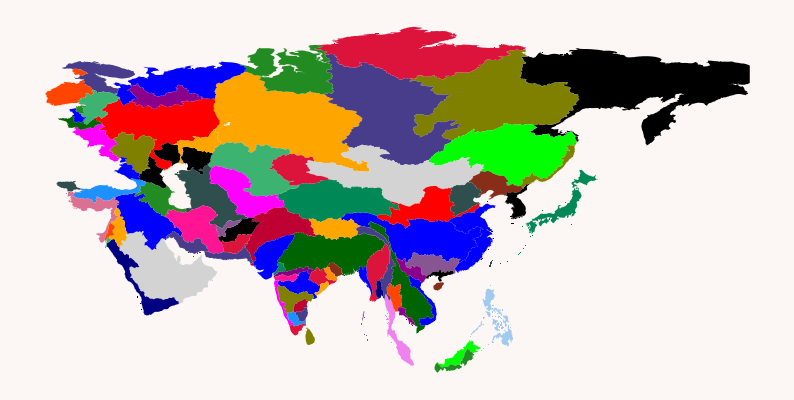

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
new_basins_copy.plot(ax=ax, column='name', color=new_basins_copy['colors'])
ax.axis('off')
plt.savefig("test.png", dpi=600, bbox_inches='tight')

In [20]:
rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_29888\549450257.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')


In [21]:
print(new_basins_copy)

                         name  \
0         Siberia, West Coast   
1                          Ob   
2                        Lena   
3                     Yenisey   
4        Siberia, North Coast   
..                        ...   
83                     Hainan   
84           Baltic Sea Coast   
85            Sinai Peninsula   
86  Andaman - Nicobar Islands   
87                     Taiwan   

                                             geometry   colors  
0   MULTIPOLYGON (((140.75000 53.10417, 140.75000 ...    black  
1   POLYGON ((74.43333 50.22917, 74.43333 50.22917...  #ffa500  
2   MULTIPOLYGON (((118.00833 54.62500, 118.00000 ...  #808000  
3   POLYGON ((97.87500 49.91667, 97.87500 49.92083...  #483d8b  
4   MULTIPOLYGON (((105.79583 72.93750, 105.79583 ...  #dc143c  
..                                                ...      ...  
83  POLYGON ((110.43333 20.05833, 110.43333 20.054...  #882D17  
84  POLYGON ((28.02083 59.65833, 28.02500 59.65833...  #228B22  
85  MULTIPOLYGON (

In [22]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.03, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)

In [23]:
x = unary_union(sub_cont.geometry.tolist())
y = x.boundary
asia = gpd.GeoDataFrame(pd.DataFrame({'name': ['asia']}), crs="EPSG:4326", geometry=[y])

In [24]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

logo = plt.imread('../../Branding/light_logo_1.png')

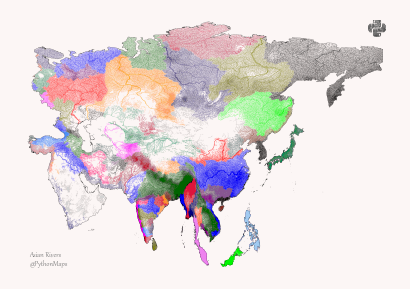

In [25]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.72, 0.8, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, "Asian Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia_rivers_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.72, 0.8, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, "Asian Rivers @PythonMaps\nData Source - hydrosheds.org",
              size=6,
              color='black',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asiavc.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia_print.png", dpi=6000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia_print_low_res.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
print(rivers_basins)

In [ ]:
=

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_LENGTH_KM'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
#newax = fig.add_axes([0.22, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.05, "East Asian Rivers \n@PythonMaps",
#              size=8,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia4.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_CATCH_SKM'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
#newax = fig.add_axes([0.22, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.05, "East Asian Rivers \n@PythonMaps",
#              size=8,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia5.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIS_AV_CMS'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
#newax = fig.add_axes([0.22, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.05, "East Asian Rivers \n@PythonMaps",
#              size=8,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia6.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_UPLAND_SKM'])
#asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
#newax = fig.add_axes([0.22, 0.76, 0.1, 0.1], anchor='NE', zorder=-1)
#newax.imshow(logo)
#newax.axis('off')
#txt = ax.text(0.02, 0.05, "East Asian Rivers \n@PythonMaps",
#              size=8,
#              color='grey',
#              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/asia7.png", dpi=1000, bbox_inches='tight')
plt.show()